## Kalman Filter の導出

以下のような離散時間表現された線形動的システムを考える
$$
x_{k+1} = A_k x_k + B_k u_k\\
z_k = C_k x_k
$$
$x_k$を状態量，$z_k$を観測値，$u_k$を入力とする．

世の中はノイズがあるので，
$$
x_{k+1} = A_k x_k + B_k u_k + w_k\\
z_k = C_k x_k + v_k
$$
とする．ただし，$w_k$と$v_k$はガウス分布に従う平均0の白色ノイズで
$$
E[w_k w_k^T] = Q\\
E[v_k v_k^T] = R
$$
とする．

現在の状態量の推定値$\bar{x}_k$，システムに対する入力値$u_k$，観測値$z_{k+1}$が今手元にあるとする．
現在の状態量の推定値を$\bar{x}_k$とすると，状態方程式から次のステップの状態量は
$$
A_k \bar{x}_k + B_k u_k
$$
になるだろうと予測できるので，これを$\hat{x}_{k+1}$とする．すなわち
$$
\hat{x}_{k+1} = A_k \bar{x}_k + B_k u_k
$$
この予測値が正しければ，観測値は
$$
C_{k+1} \hat{x}_{k+1}
$$
となるはずだが，実際の観測値は$z_{k+1}$だったわけなので，このあんばいを良くしたい．
よって，
$$
\bar{x}_{k+1} = \hat{x}_{k+1} + K_k (z_{k+1} - C_{k+1} \hat{x}_{k+1})
$$
とする．

$K_k = 0$とすると，観測値は無視できて状態方程式を100%信頼することになり，$K_k = C_k^{-1}$とすると，観測値を100%信じて状態方程式を無視することになる．
つまり，$K_k$が状態方程式を信じるか観測値を信じるかの重みになっていて，これをbest practiceな値にしたい．つまり，最適制御したい．

真値と推定値の誤差の共分散を最小にすることを考える．
$$
\bar{P}_{k+1} = E[(x_{k+1} - \bar{x}_{k+1})(x_{k+1} - \bar{x}_{k+1})^T]
$$
ここで$\bar{x}_{k+1} = \hat{x}_{k+1} + K_k (z_{k+1} - C_{k+1} \hat{x}_{k+1})$と$z_{k+1} = C_{k+1} x_{k+1} + v_{k+1}$なので，真値と推定値の誤差は
$$
x_{k+1} - \bar{x}_{k+1} = (I - K_k C_{k+1})(x_{k+1} - \hat{x}_{k+1}) - K_k v_{k+1}
$$
となる．
真値と予測値の誤差の共分散を
$$
\hat{P}_{k+1} = E[(x_{k+1} - \hat{x}_{k+1})(x_{k+1} - \hat{x}_{k+1})^T]
$$
として，$E[(x_{k+1} - \hat{x}_{k+1})v_k^T]=0$であることを利用すると，単純な式変形で
$$
\bar{P}_{k+1} = (I - K_k C_{k+1}) \hat{P}_{k+1} (I - K_k C_{k+1})^T + K_k R K_k^T
$$
となることが分かる．
$K_k$を変化させたときに$\bar{P}_{k+1}$が最小値になるような$K_k$を見つければ良い．
ここで，謎のテクニックが出てきて，$\bar{P}_{k+1}$のtraceを$K_k$で微分したものが0となるとする．
よって
$$
K_k = \hat{P}_{k+1} C_{k+1}^T(C_{k+1} \hat{P}_{k+1} C_{k+1}^T + R)^{-1}
$$
と求まる．

また，これを$\bar{P}_{k+1}$の式に代入して整理すると
$$
\bar{P}_{k+1} = (I - K_k C_{k+1})\hat{P}_{k+1}
$$

さらに，$x_{k+1} - \hat{x}_{k+1} = A_k x_k + B_k u_k + w_k - (A_k \bar{x}_k + B_k u_k) = A_k (x_k - \bar{x}_k) + w_k$なので，
$$
\hat{P}_{k+1} = E[(x_{k+1} - \hat{x}_{k+1})(x_{k+1} - \hat{x}_{k+1})^T] = A_k \bar{P}_k A_k^T + Q
$$
となる．

以上より，予測ステップは
$$
\begin{align}
\hat{x}_{k+1} &= A_k \bar{x}_k + B_k u_k\\
\hat{P}_{k+1} &= A_k \bar{P}_k A_k^T + Q
\end{align}
$$
であり，更新ステップは
$$
\begin{align}
K_k &= \hat{P}_{k+1} C_{k+1}^T(C_{k+1} \hat{P}_{k+1} C_{k+1}^T + R)^{-1}\\
\bar{x}_{k+1} &= \hat{x}_{k+1} + K_k (z_{k+1} - C_{k+1} \hat{x}_{k+1})\\
\bar{P}_{k+1} &= (I - K_k C_{k+1})\hat{P}_{k+1}
\end{align}
$$
となる．

## sample program
http://satomacoto.blogspot.jp/2011/06/python.html を参考にした．

GPS搭載していて，速度一定で動く物体のKalman Filterを考える．

$$
\begin{align}
\begin{pmatrix}
x_{k+1}\\
y_{k+1}
\end{pmatrix} &=
\begin{pmatrix}
1 & 0\\
0 & 1
\end{pmatrix}
\begin{pmatrix}
x_{k}\\
y_{k}
\end{pmatrix} +
\begin{pmatrix}
dt & 0\\
0 & dt
\end{pmatrix}
\begin{pmatrix}
2\\
2
\end{pmatrix} + w\\
Q &=
\begin{pmatrix}
1 & 0\\
0 & 1
\end{pmatrix}\\
z_k &=
\begin{pmatrix}
1 & 0\\
0 & 1
\end{pmatrix}
\begin{pmatrix}
x_{k}\\
y_{k}
\end{pmatrix} + v_k\\
R &=
\begin{pmatrix}
2 & 0\\
0 & 2
\end{pmatrix}
\end{align}
$$


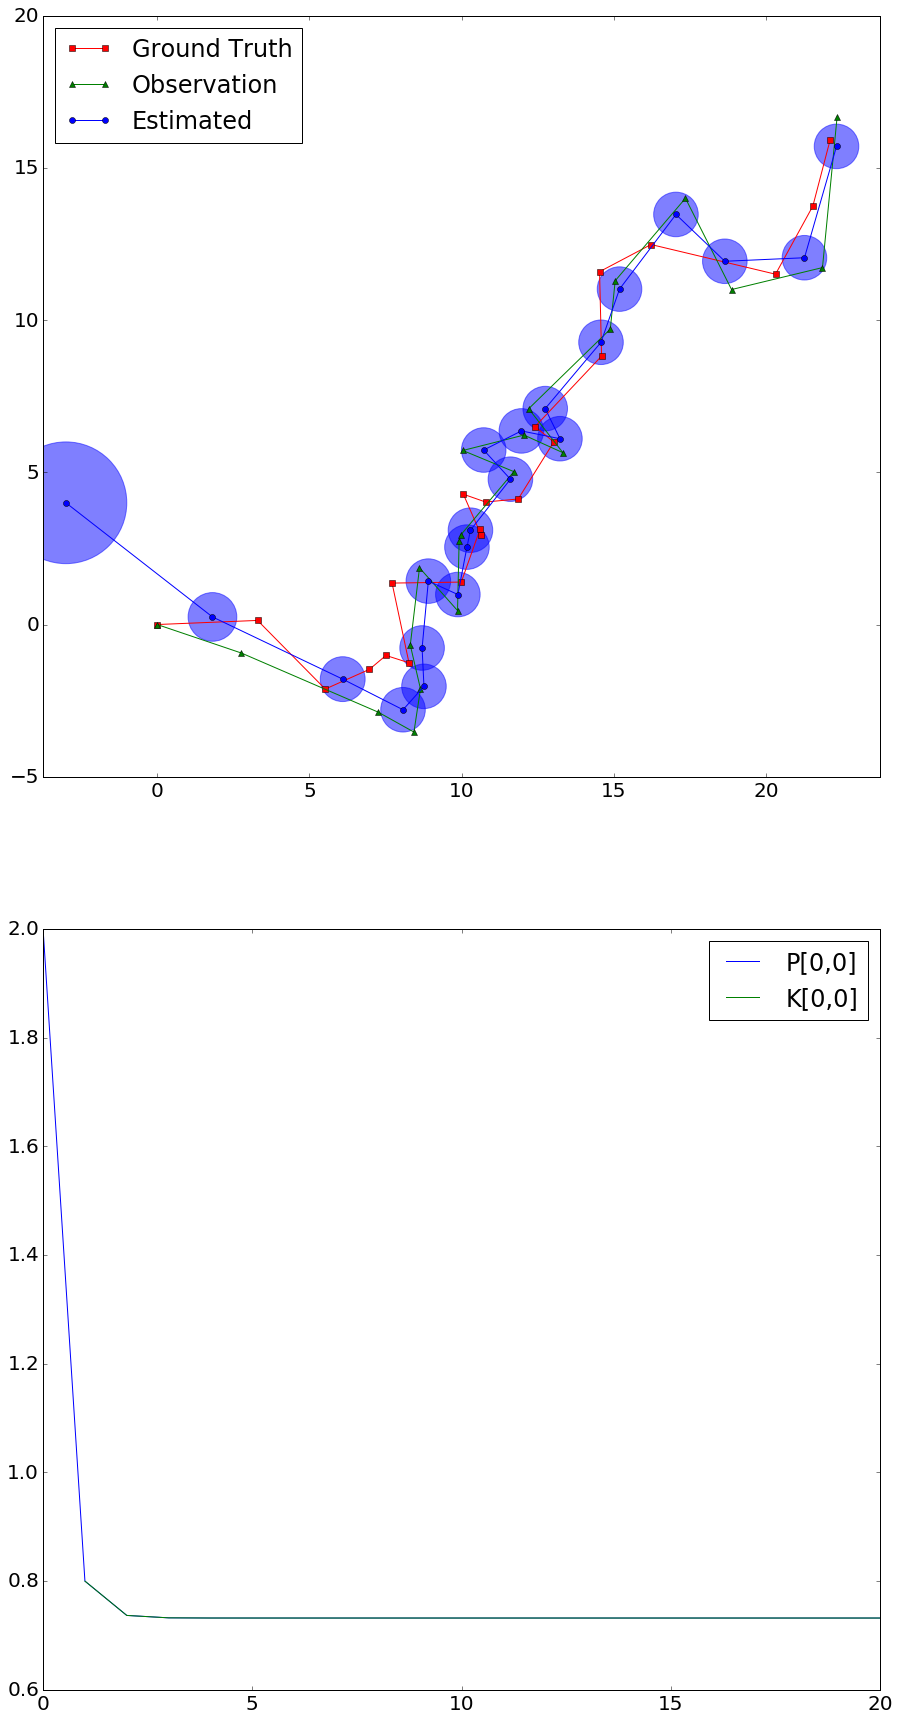

In [61]:
# http://satomacoto.blogspot.jp/2011/06/python.html

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse

def plot_cov_ellipse(cov, pos, nstd=2, ax=None, **kwargs):
    def eigsorted(cov):
        vals, vecs = np.linalg.eigh(cov)
        order = vals.argsort()[::-1]
        return vals[order], vecs[:,order]

    if ax is None:
        ax = plt.gca()

    vals, vecs = eigsorted(cov)
    theta = np.degrees(np.arctan2(*vecs[:,0][::-1]))

    # width, height = 2 * nstd * np.sqrt(vals)
    width, height = 2 * nstd * vals
    ellip = Ellipse(xy=pos, width=width, height=height, angle=theta, **kwargs)

    ax.add_artist(ellip)
    return ellip


def lkf(T, Y, U, mu0, Sigma0, A, B, C, Q, R):
    '''Linear Kalman Filter
    - 状態方程式
        x = A * x_ + B * u + w, w ~ N(0,Q)
    - 観測方程式
        y = C * x + v, v ~ N(0,R)
    Parameters
    ==========
    - T : ステップ数
    - Y : 観測列
    - U : 入力列
    - mu0 : 初期状態推定値
    - Sigma0 : 初期誤差共分散行列
    - A, B, C, Q, R : カルマンフィルタの係数
    Returns
    =======となっている．
    - M : 状態推定値列
    '''

    mu = mu0 # 初期状態推定値
    Sigma = Sigma0 # 初期誤差共分散行列

    M = [mu] # 状態推定値列
    SM = [Sigma]
    K_list = []

    for i in range(T):
        # 推定
        mu_ = A * mu + B * U[i]
        Sigma_ = Q + A * Sigma * A.T

        # 更新
        yi = Y[i+1] - C * mu_
        S = C * Sigma_ * C.T + R
        K = Sigma_ * C.T * S.I
        mu = mu_ + K * yi
        Sigma = Sigma_ - K * C * Sigma_
        M.append(mu)
        SM.append(Sigma)
        K_list.append(K)

    return M, SM, K_list

Q_el = 2
R_el = 1
T_el = 20
def main():
    # 状態方程式
    # x = A * x_ + B * u + w, w ~ N(0,Q)
    A = np.mat([[1,0], [0,1]])
    B = np.mat([[0.5,0], [0,0.5]])
    Q = np.mat([[Q_el,0], [0,Q_el]])
    # 観測方程式
    # y = C * x + v, v ~ N(0,R)
    C = np.mat([[1,0], [0,1]])
    R = np.mat([[R_el,0], [0,R_el]])

    # 観測のテストデータの生成
    T = T_el # 観測数
    x = np.mat([[0],[0]]) # 初期位置
    X = [x] # 状態列
    Y = [x] # 観測列
    u = np.mat([[2],[2]]) # 入力（一定）
    U = [u] # 入力列
    for i in range(T):
        x = A * x + B * u + np.random.multivariate_normal([0, 0], Q, 1).T
        X.append(x)
        y = C * x + np.random.multivariate_normal([0, 0], R, 1).T
        Y.append(y)
        U.append(u)

    # LKF
    mu0 = np.mat([[-3],[4]]) # 初期状態推定値
    Sigma0 = np.mat([[2,0],[0,2]]) # 初期誤差共分散行列
    M, SM, K_list = lkf(T, Y, U, mu0, Sigma0, A, B, C, Q, R)

    # 描画
    f, (axes) = plt.subplots(2, 1)
    a, b = np.array(np.concatenate(X,axis=1))
    axes[0].plot(a,b,'rs-', label='Ground Truth')
    a, b = np.array(np.concatenate(Y,axis=1))
    axes[0].plot(a,b,'g^-', label='Observation')
    a, b = np.array(np.concatenate(M,axis=1))
    axes[0].plot(a,b,'bo-', label='Estimated')
    for i in range(len(SM)):
        plot_cov_ellipse(SM[i], M[i], ax = axes[0], nstd=1, alpha=0.5, color='blue')
    axes[0].axis('equal')
    axes[0].legend(loc=0)
    
    axes[1].plot(range(T+1), [y[0,0] for y in SM], label='P[0,0]')
    axes[1].plot([x + 1 for x in range(T)], [y[0,0] for y in K_list], label='K[0,0]')
    axes[1].legend(loc=0)
    plt.show()

if __name__ == '__main__':
    np.random.seed(1)
    plt.rcParams['figure.figsize'] = (15.0, 30.0)
    plt.rcParams["font.size"] = 20
    main()

PとKはそれぞれ
$$
P = \begin{pmatrix}
1 & 0\\
0 & 1
\end{pmatrix}\\
K = \begin{pmatrix}
0.5 & 0\\
0 & 0.5
\end{pmatrix}
$$
に収束した．
状態方程式を信用するなら$K = 0$だし，観測を信用するなら$K = C_{k}^{-1} = \begin{pmatrix}
1 & 0\\
0 & 1
\end{pmatrix}$となるが，その中間となっている．

Qをかなり大きくすると，状態方程式が信用ならなくなって，以下のようにカルマンゲインが1になる．

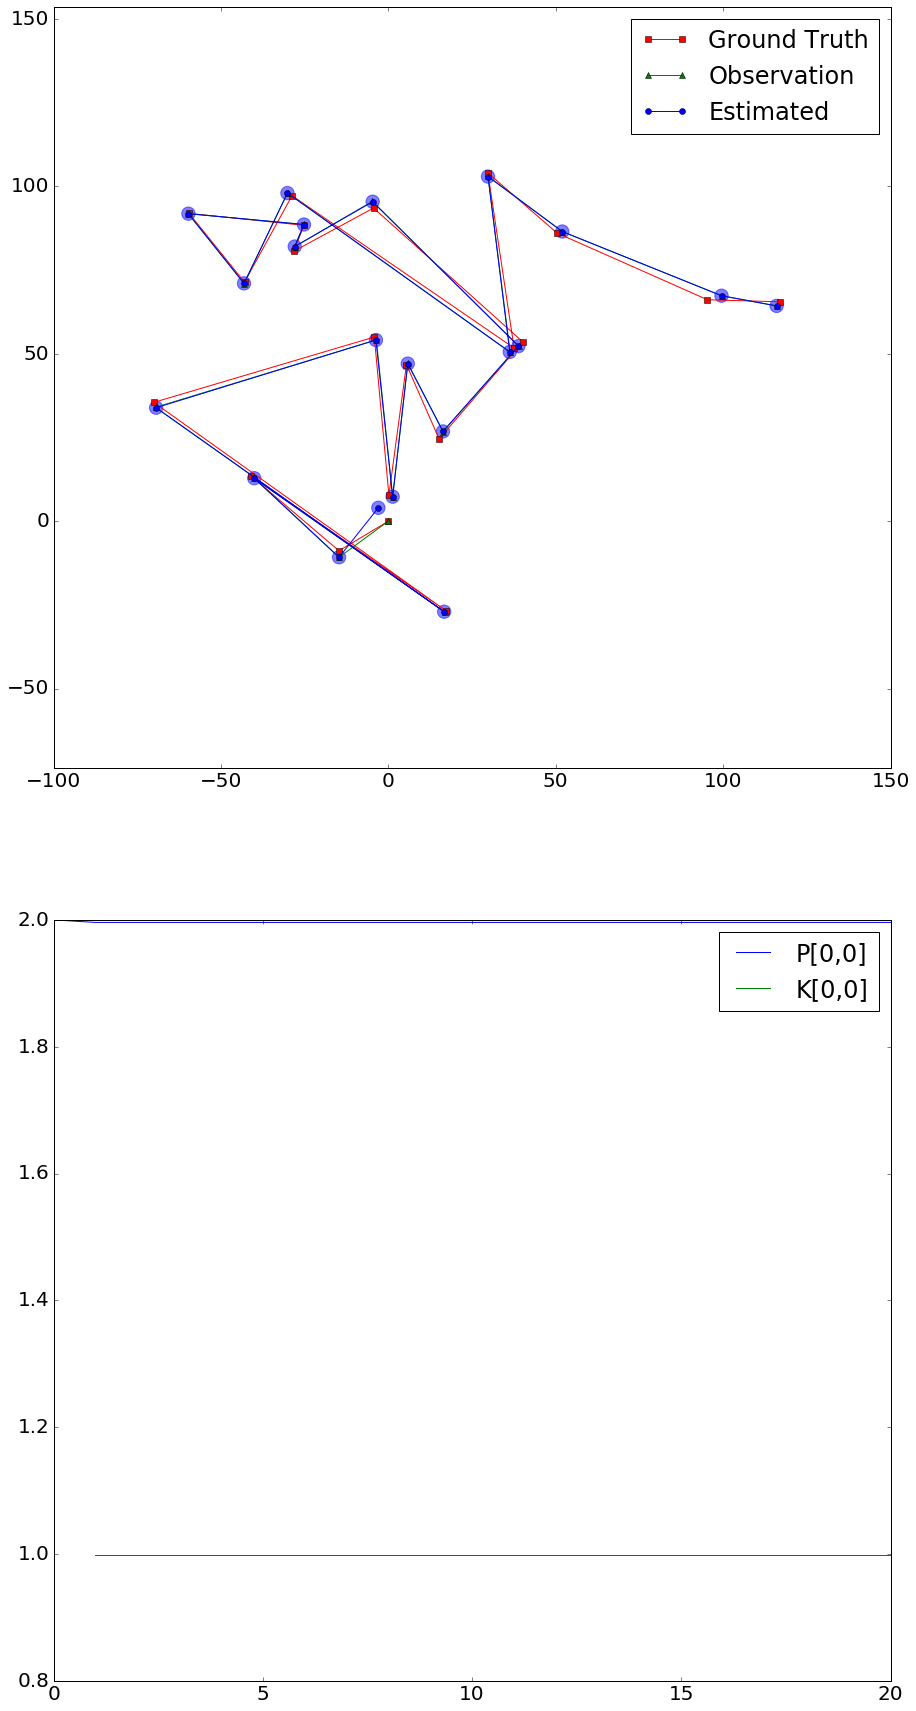

In [54]:
Q_el = 1000
R_el = 2
main()

一方，Rを大きくすると，観測が信用ならなくなって，Kが0に近づく．

しかし，初期値がそもそもずれているので，状態方程式だけを信じていても，GroundTruthにはあまり近づかない．

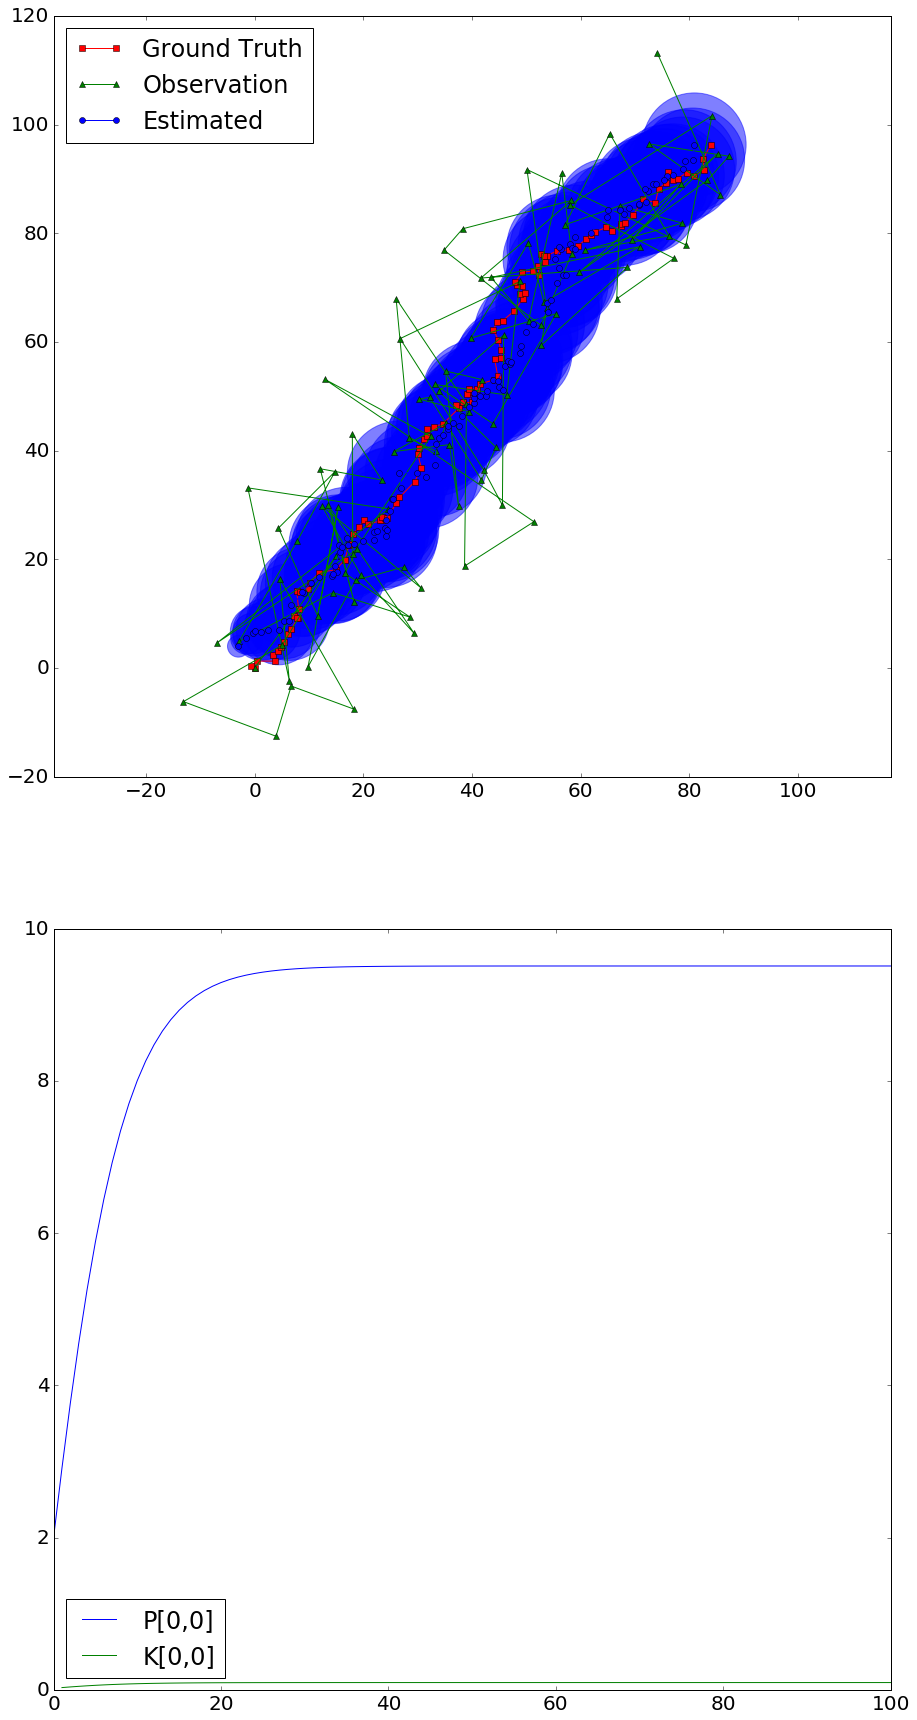

In [70]:
Q_el = 1
R_el = 100
T_el = 100
main()